In [16]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

Now, we create the frozen lake environment using gym:

In [17]:
# Create the FrozenLake environment using gym
env = gym.make('FrozenLake-v1')

The following function allows you to display the Q-table of a reinforcement learning environment.

In [18]:
def plot_q_values(Q, env, figsize=(15, 10)):
    num_states, num_actions = Q.shape  # Get the dimensions of Q
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(Q, cmap='cool')

    for i in range(num_states):
        for j in range(num_actions):
            ax.text(j, i, f"{Q[i, j]:.3f}", ha='center', va='center', fontsize=14)

    ax.set_xticks(np.arange(num_actions))
    ax.set_yticks(np.arange(num_states))
    ax.set_xticklabels([str(a) for a in range(num_actions)])
    ax.set_yticklabels([str(s) for s in range(num_states)])
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.title('Q-Table')
    plt.show()

Now, let's define the epsilon-greedy policy. We generate a random number from the uniform distribution and if the random number is less than epsilon we select the random action else we select the best action which has the maximum Q value

In [19]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key=lambda a: Q[state][a])

In [20]:
num_episodes = 5000
num_timesteps = 1000

# Define a range of hyperparameter values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.8, 0.85, 0.9, 0.95, 1.0]
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize lists to store metrics
average_rewards = []
success_rates = []
average_steps_to_goal_list = []
exploration_rates = []
hyperparameter_combinations = []

best_result = float('inf')
best_hyperparameters = None
best_Q = None

This code performs hyperparameter tuning and training for a reinforcement learning algorithm using the TD(0) (Temporal Difference 0) learning method. It explores different combinations of hyperparameters and tracks various performance metrics to identify the best set of hyperparameters for the given environment.

In [21]:
# Define a function to initialize Q-values
def initialize_q_values(num_states, num_actions):
    Q = np.zeros((num_states, num_actions))
    return Q

# Define a function to update Q-values using TD(0)
def update_q_values(Q, alpha, gamma, epsilon):
    total_reward = 0
    success_count = 0
    total_steps_to_goal = 0
    total_exploration_steps = 0

    for i in range(num_episodes):
        s = env.reset()
        steps_to_goal = 0
        exploration_steps = 0

        for t in range(num_timesteps):
            a = epsilon_greedy(s, epsilon)
            s_, r, done, _ = env.step(a)
            Q[s][a] += alpha * (r + gamma * max(Q[s_]) - Q[s][a])
            total_reward += r
            steps_to_goal += 1
            exploration_steps += int(random.uniform(0, 1) < epsilon)

            s = s_

            if done:
                break

            if r == 1:
                success_count += 1

        total_steps_to_goal += steps_to_goal
        total_exploration_steps += exploration_steps

    average_reward = total_reward / num_episodes
    success_rate = success_count / num_episodes
    average_steps_to_goal = total_steps_to_goal / num_episodes
    exploration_rate = total_exploration_steps / (num_episodes * num_timesteps)

    return Q, (alpha, gamma, epsilon), average_reward, success_rate, average_steps_to_goal, exploration_rate

# Hyperparameter tuning loop
for alpha in alphas:
    for gamma in gammas:
        for epsilon in epsilons:
            Q = initialize_q_values(env.observation_space.n, env.action_space.n)
            Q, hyperparameters, average_reward, success_rate, average_steps_to_goal, exploration_rate = update_q_values(Q, alpha, gamma, epsilon)

            hyperparameter_combinations.append(hyperparameters)
            average_rewards.append(average_reward)
            success_rates.append(success_rate)
            average_steps_to_goal_list.append(average_steps_to_goal)
            exploration_rates.append(exploration_rate)

            if average_steps_to_goal < best_result:
                best_result = average_steps_to_goal
                best_hyperparameters = hyperparameters
                best_Q = Q

            print("Hyperparameters:", hyperparameters)
            print("Average Reward:", average_reward)
            print("Success Rate:", success_rate)
            print("Average Steps to Goal:", average_steps_to_goal)
            print("Exploration Rate:", exploration_rate)
            print("-------------")

# Print the best hyperparameters and their corresponding success rate
print("Best Hyperparameters:", best_hyperparameters)
print("Best Average Steps to Goal:", best_result)

Hyperparameters: (0.1, 0.8, 0.1)
Average Reward: 0.0
Success Rate: 0.0
Average Steps to Goal: 15.316
Exploration Rate: 0.001491
-------------
Hyperparameters: (0.1, 0.8, 0.2)
Average Reward: 0.1096
Success Rate: 0.0
Average Steps to Goal: 13.5274
Exploration Rate: 0.0027056
-------------
Hyperparameters: (0.1, 0.8, 0.3)
Average Reward: 0.0976
Success Rate: 0.0
Average Steps to Goal: 12.4544
Exploration Rate: 0.0037192
-------------
Hyperparameters: (0.1, 0.8, 0.4)
Average Reward: 0.0626
Success Rate: 0.0
Average Steps to Goal: 11.3544
Exploration Rate: 0.0045528
-------------
Hyperparameters: (0.1, 0.8, 0.5)
Average Reward: 0.0514
Success Rate: 0.0
Average Steps to Goal: 10.2614
Exploration Rate: 0.0051588
-------------
Hyperparameters: (0.1, 0.85, 0.1)
Average Reward: 0.0
Success Rate: 0.0
Average Steps to Goal: 15.0022
Exploration Rate: 0.0015098
-------------
Hyperparameters: (0.1, 0.85, 0.2)
Average Reward: 0.0348
Success Rate: 0.0
Average Steps to Goal: 13.4136
Exploration Rate: 0

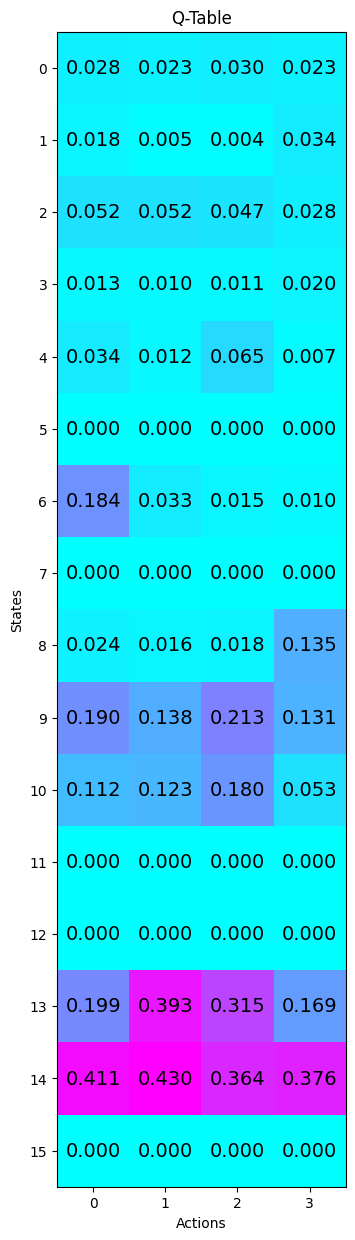

In [22]:
plot_q_values(best_Q, env, figsize=(20, 15))

Generating four separate plots to visualize the average rewards, success rate, average steps to reach the goal, and exploration rate, based on the different hyperparameters tested.

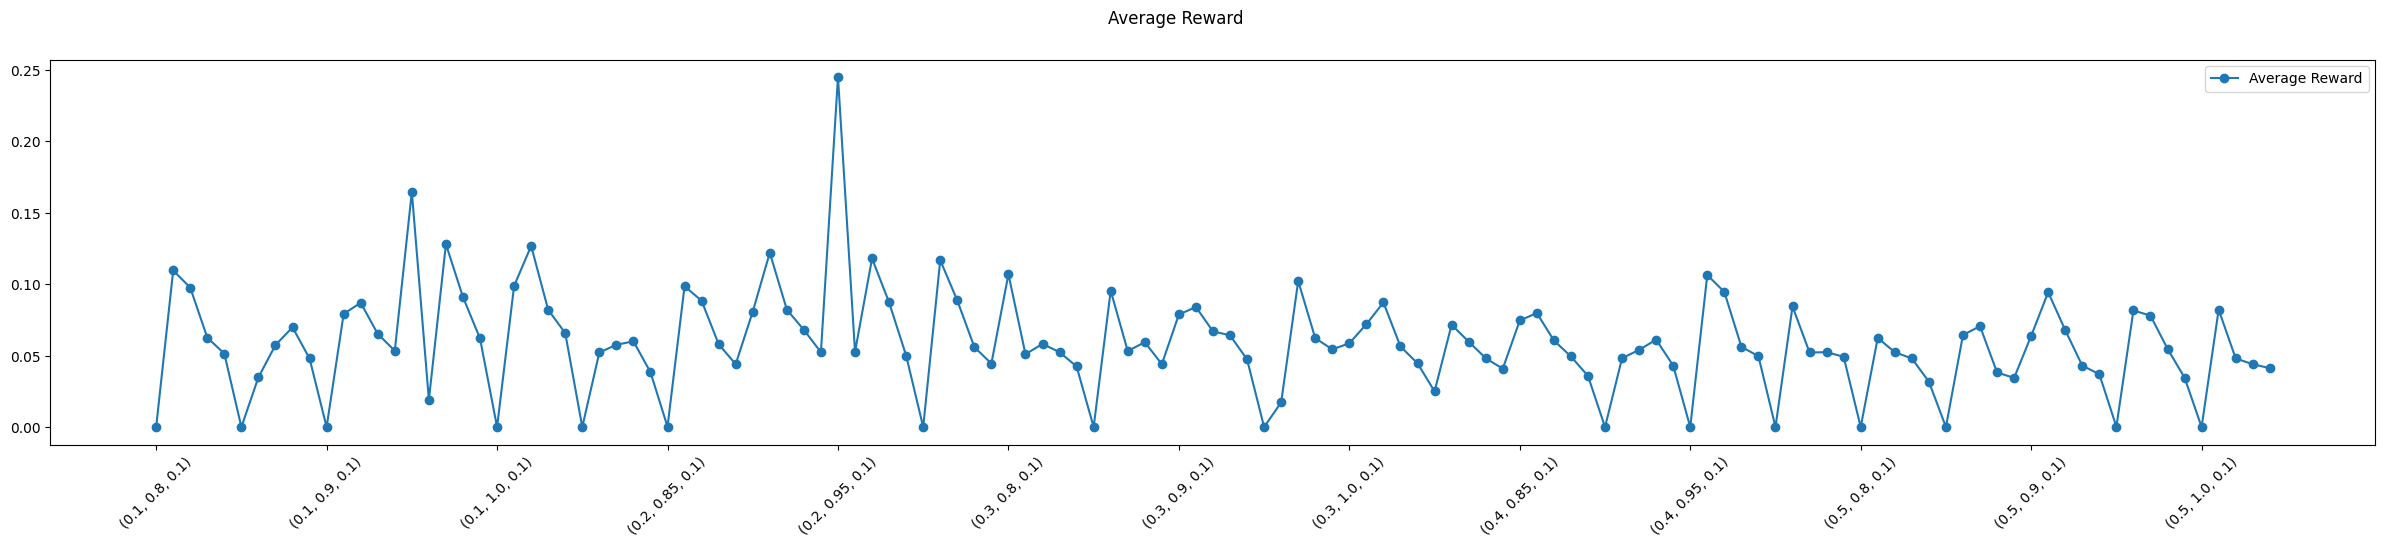

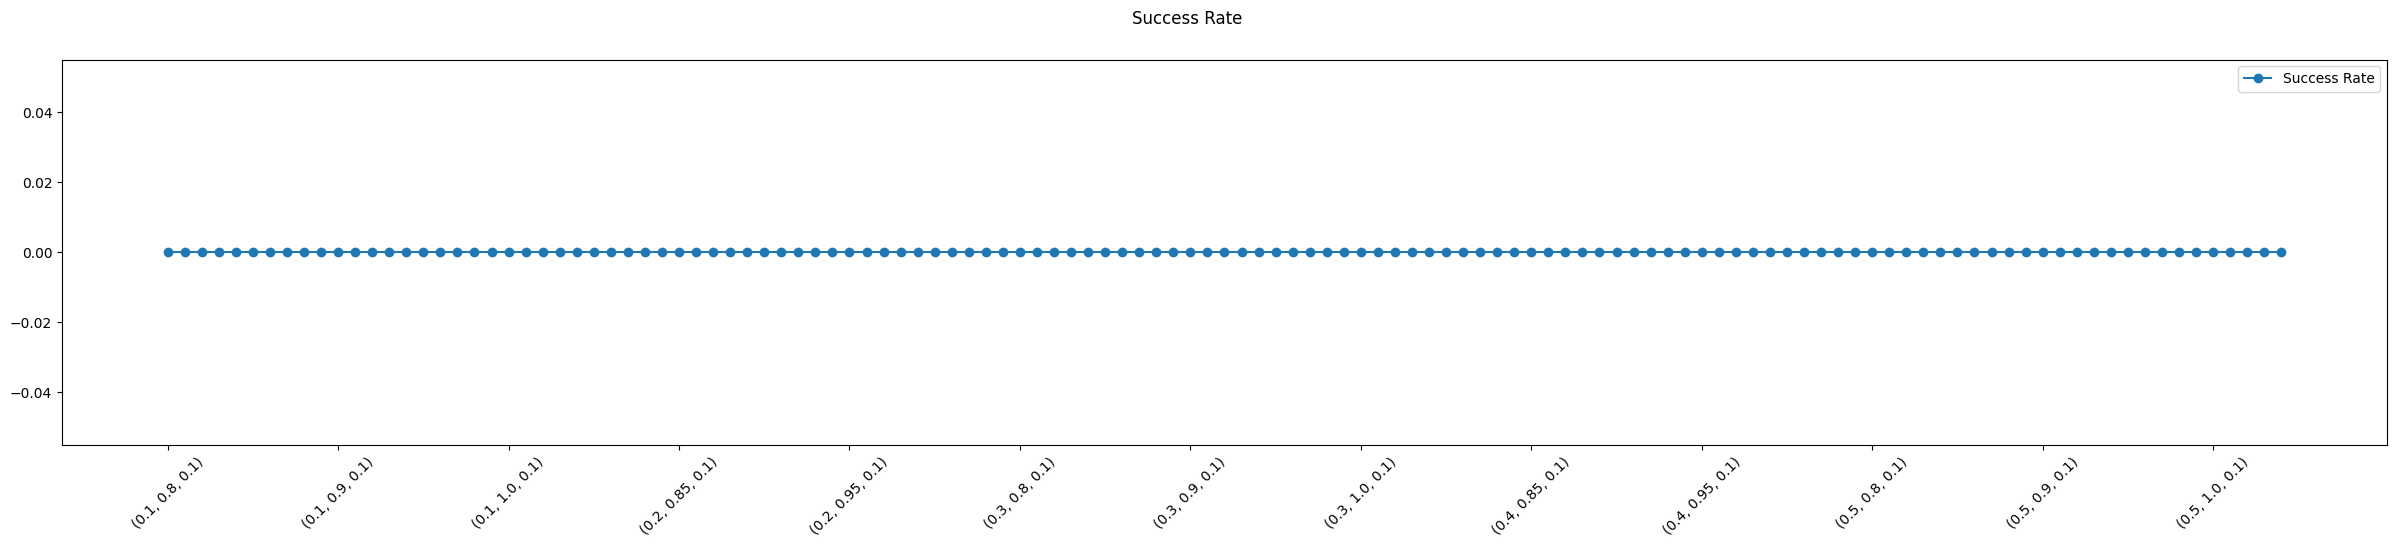

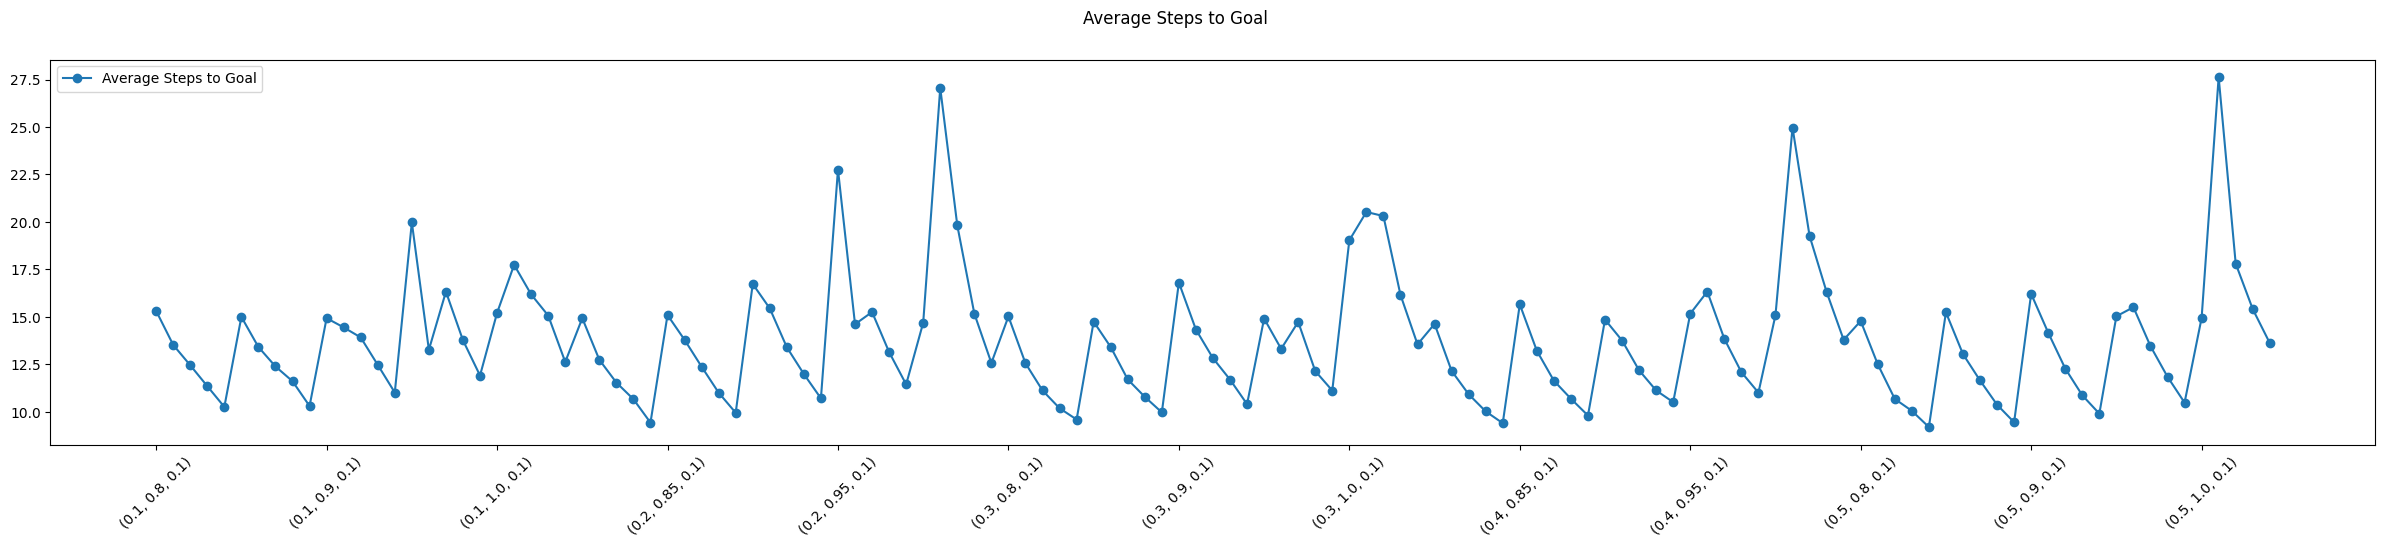

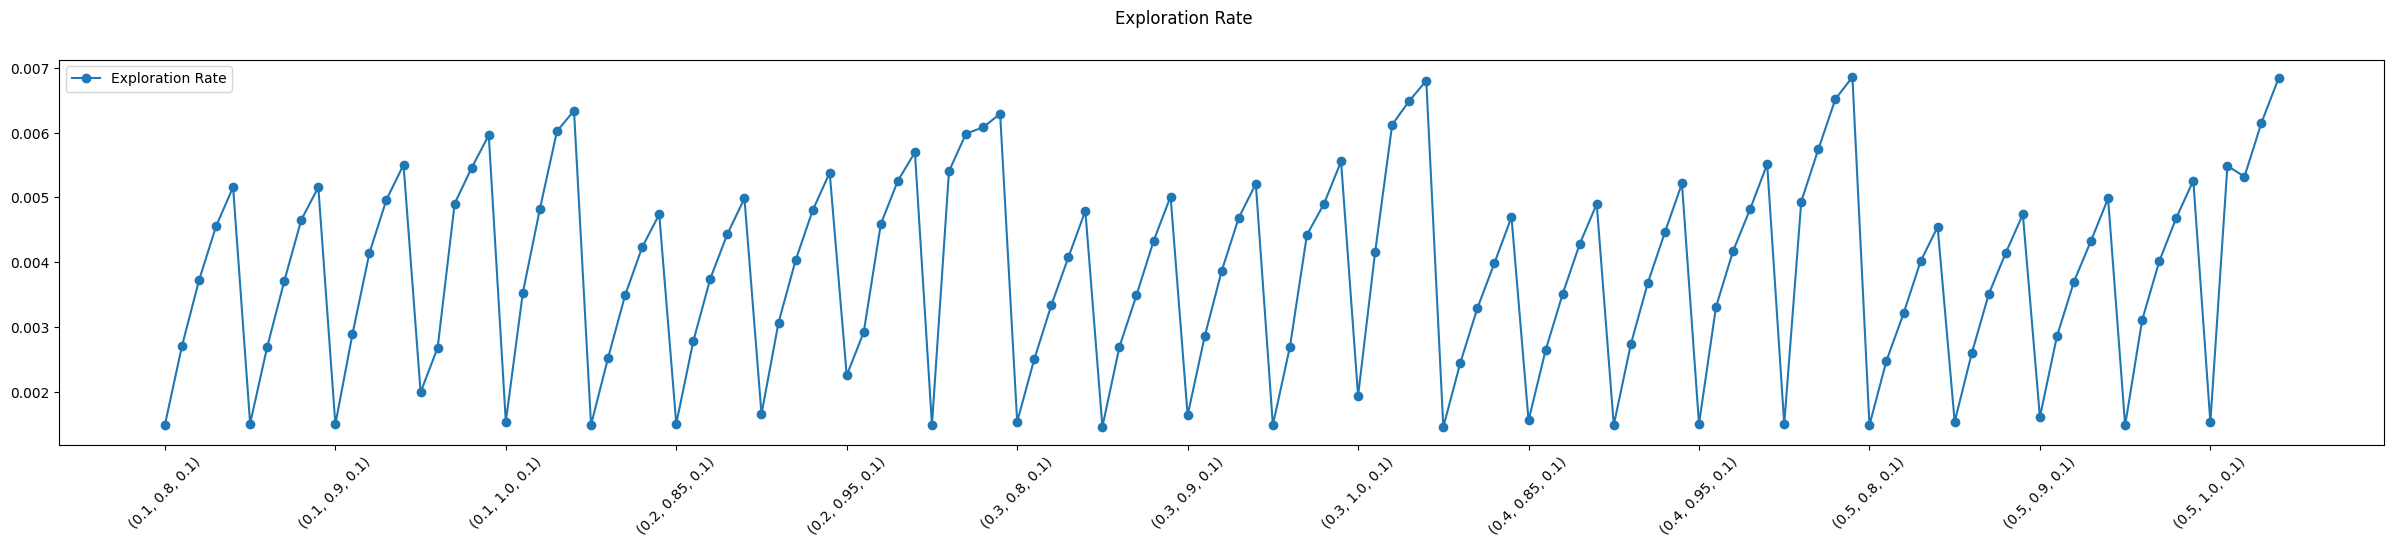

In [23]:
fig1, ax1 = plt.subplots(figsize=(30, 5))
fig2, ax2 = plt.subplots(figsize=(30, 5))
fig3, ax3 = plt.subplots(figsize=(30, 5))
fig4, ax4 = plt.subplots(figsize=(30, 5))

fig1.suptitle('Average Reward')
fig2.suptitle('Success Rate')
fig3.suptitle('Average Steps to Goal')
fig4.suptitle('Exploration Rate')

ax1.plot(range(len(hyperparameter_combinations)), average_rewards, label='Average Reward', marker='o')
ax2.plot(range(len(hyperparameter_combinations)), success_rates, label='Success Rate', marker='o')
ax3.plot(range(len(hyperparameter_combinations)), average_steps_to_goal_list, label='Average Steps to Goal', marker='o')
ax4.plot(range(len(hyperparameter_combinations)), exploration_rates, label='Exploration Rate', marker='o')

x_ticks = range(0, len(hyperparameter_combinations), 10)
x_tick_labels = [hyperparameter_combinations[i] for i in x_ticks]
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_tick_labels, rotation=45)
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tick_labels, rotation=45)
ax3.set_xticks(x_ticks)
ax3.set_xticklabels(x_tick_labels, rotation=45)
ax4.set_xticks(x_ticks)
ax4.set_xticklabels(x_tick_labels, rotation=45)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()


All the curves are plotted on a single graph.

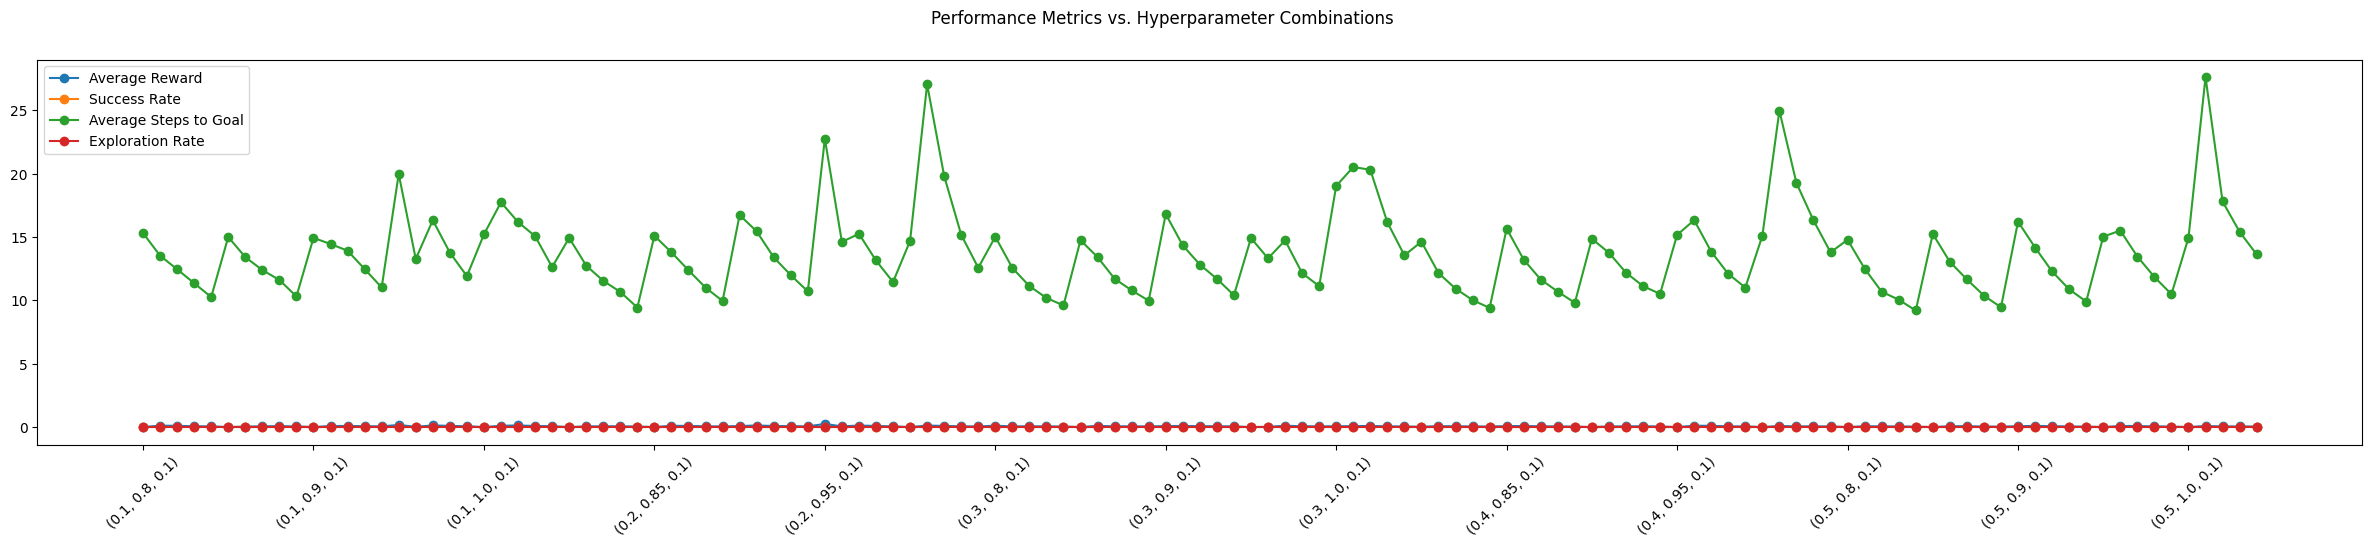

In [24]:
fig, ax = plt.subplots(figsize=(30, 5))
fig.suptitle('Performance Metrics vs. Hyperparameter Combinations')

ax.plot(range(len(hyperparameter_combinations)), average_rewards, label='Average Reward', marker='o')
ax.plot(range(len(hyperparameter_combinations)), success_rates, label='Success Rate', marker='o')
ax.plot(range(len(hyperparameter_combinations)), average_steps_to_goal_list, label='Average Steps to Goal', marker='o')
ax.plot(range(len(hyperparameter_combinations)), exploration_rates, label='Exploration Rate', marker='o')

x_ticks = range(0, len(hyperparameter_combinations), 10)
x_tick_labels = [hyperparameter_combinations[i] for i in x_ticks]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45)

ax.legend()

plt.show()
